<a href="https://colab.research.google.com/github/ChenyueCai/UCSF-OnBoarding-Proj/blob/master/ucsf_onbroading_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install pydicom

     |████████████████████████████████| 35.5MB 119kB/s 


Write a function that can load DICOM or PNG file and then convert them to user specified image size (ex: 299 x 299 or 229x229) numpy files. The DICOM files may be compressed or uncompresed. This function needs to be user-friendly and should be able to stand on its own. The image re-sizing can be done by SKlearn or other library.
5) Combine the numpy file with breast density information (binary) to create numpyZ files.


Read DICOM and ploting using matplotlib

This example illustrates how to open a DICOM file, print some dataset
information, and show it using matplotlib.



Filename.........: 1-2.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.7

Patient's name...: P_00038, P_00038
Patient id.......: P_00038_LEFT_CC_1.dcm
Modality.........: MG
Study Date.......: 
Image size.......: 4616 x 3016, 13921856 bytes
Slice location...: (missing)


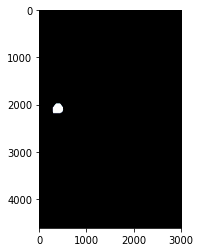

In [12]:
"""
=======================================
Read DICOM and ploting using matplotlib
=======================================

This example illustrates how to open a DICOM file, print some dataset
information, and show it using matplotlib.

"""

# authors : Guillaume Lemaitre <g.lemaitre58@gmail.com>
# license : MIT

import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

print(__doc__)

filename = '1-2.dcm'
dataset = pydicom.dcmread('1-2.dcm')

# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

pat_name = dataset.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print("Patient's name...:", display_name)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()
